## 3. Infant Health


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
std_u = pd.read_csv("./PRAMS ARF/csv/phase8_2016_2021_std_u.csv")
op_supp = pd.read_csv("./Opioid Supp/phase8_sup_opioid.csv")


print(std_u.shape)
print(op_supp.shape)

(15070, 15)
(41166, 86)


/var/folders/cl/y_lffsqj7gq3svpspqz96pxw0000gn/T/ipykernel_82608/3715096411.py:2: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  op_supp = pd.read_csv("./Opioid Supp/phase8_sup_opioid.csv")


In [4]:
df_any_point = pd.read_csv("./Cohorts/any_points.csv", low_memory=False)
df_all_points = pd.read_csv("./Cohorts/all_points.csv", low_memory=False)

df_before = pd.read_csv("./Cohorts/before.csv", low_memory=False)  # newest
df_during = pd.read_csv("./Cohorts/during.csv", low_memory=False)  # newer
df_after = pd.read_csv("./Cohorts/after.csv", low_memory=False)  # newest

df_not_during = pd.read_csv("./Cohorts/not_during.csv", low_memory=False)  # newer
df_during_only = pd.read_csv("./Cohorts/during_only.csv", low_memory=False)

df_during_after_not_before = pd.read_csv("./Cohorts/during_after_not_before.csv", low_memory=False)
df_before_during_not_after = pd.read_csv("./Cohorts/before_during_not_after.csv", low_memory=False)
df_during_after = pd.read_csv("./Cohorts/during_after.csv", low_memory=False)

df_lost = pd.read_csv("./Cohorts/lost.csv", low_memory=False)
df_never = pd.read_csv("./Cohorts/never.csv", low_memory=False)

In [5]:
print(df_any_point.shape)
print(df_all_points.shape)

print(df_before.shape)
print(df_during.shape)
print(df_after.shape)

print(df_not_during.shape)
print(df_during_only.shape)

print(df_during_after_not_before.shape)
print(df_before_during_not_after.shape)
print(df_during_after.shape)

print(df_lost.shape)
print(df_never.shape)

(4117, 572)
(3319, 572)
(3608, 572)
(3895, 572)
(3821, 572)
(316, 572)
(146, 572)
(296, 572)
(134, 572)
(3615, 572)
(280, 572)
(61, 572)


In [6]:
cols_all = [
    "LTH_HOSP",
    "INFWMOM5_RAW",
    "AB_NICU",
    "KOTELCHUCK"
]

cols_TF = [
    "Before",
    "During",
    "After"
]

In [7]:
df_all_points["Cohort"] = "all points"
df_any_point["Cohort"] = "any point"

#df_before["Cohort"] = "before"
df_during["Cohort"] = "during"
df_not_during["Cohort"] = "not during"
df_during_only["Cohort"] = "during only"


df_after["Cohort"] = "after"
df_lost["Cohort"] = "not after"
df_never["Cohort"] = "never"


df_during_after_not_before["Cohort"] = "during and after, not before"
df_before_during_not_after["Cohort"] = "before and during, not after"
df_during_after["Cohort"] = "during and after"



df_combined = pd.concat([

    df_all_points[["ID", "Cohort"] + cols_all + cols_TF],
    df_any_point[["ID", "Cohort"] + cols_all + cols_TF],


    #df_before[["ID", "Cohort"] + cols_all + cols_TF],
    df_during[["ID", "Cohort"] + cols_all + cols_TF],
    df_not_during[["ID", "Cohort"] + cols_all + cols_TF],
    df_during_only[["ID", "Cohort"] + cols_all + cols_TF],

    df_after[["ID", "Cohort"] + cols_all + cols_TF],
    df_lost[["ID", "Cohort"] + cols_all + cols_TF],
    df_never[["ID", "Cohort"] + cols_all + cols_TF],


    df_during_after_not_before[["ID", "Cohort"] + cols_all + cols_TF],
    df_before_during_not_after[["ID", "Cohort"] + cols_all + cols_TF],
    df_during_after[["ID", "Cohort"] + cols_all + cols_TF],





])


# print(df_combined[df_combined["LTH_HOSP"].eq(float(6))]['Cohort'].value_counts())

dropped = df_combined[df_combined["LTH_HOSP"].eq(float(6))].drop_duplicates(subset='ID').shape[0]
print(f"removed {dropped} entires, infant not born in hospital")

df_combined = df_combined[df_combined["LTH_HOSP"].ne(float(6))].reset_index(drop=True)

removed 19 entires, infant not born in hospital


#### Size of Cohorts


In [8]:
df_combined["Cohort"].value_counts(sort=False)

Cohort
all points                      3306
any point                       4100
during                          3880
not during                       312
during only                      146
after                           3804
not after                        280
never                             58
during and after, not before     294
before and during, not after     134
during and after                3600
Name: count, dtype: int64

#### df_combined_2 for BBY_DRUG_WD and DP_MAT_RAW


In [9]:
df_combined_2 = df_combined.copy()

temp = pd.merge(op_supp, std_u, how="outer", on="ID")
df_combined_2 = pd.merge(df_combined_2, temp, how='left', on="ID")

df_combined_2 = df_combined_2[[
    'ID', 
    "Cohort",
    "LTH_HOSP",
    "INFWMOM5_RAW",
    "BBY_DRUG_WD",
    "AB_NICU",
    "DP_MAT_RAW",
    "KOTELCHUCK",
    "Before",
    "During",
    "After"
    ]]

df_combined_2

,ID,Cohort,LTH_HOSP,INFWMOM5_RAW,BBY_DRUG_WD,AB_NICU,DP_MAT_RAW,KOTELCHUCK,Before,During,After
0,2016AK327057,all points,5.0,2.0,NaN,NaN,NaN,3.0,True,True,True
1,2016AK327072,all points,5.0,2.0,NaN,NaN,NaN,4.0,True,True,True
2,2016AK327130,all points,5.0,2.0,NaN,NaN,NaN,4.0,True,True,True
3,2016AK330064,all points,5.0,2.0,NaN,NaN,NaN,1.0,True,True,True
4,2016AK331079,all points,5.0,2.0,NaN,NaN,NaN,1.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
19909,2021WY174044,during and after,4.0,2.0,NaN,N,2.0,3.0,True,True,True
19910,2021WY175065,during and after,3.0,2.0,NaN,N,NaN,4.0,True,True,True
19911,2021WY176005,during and after,3.0,2.0,NaN,N,1.0,2.0,True,True,True
19912,2021WY176009,during and after,5.0,2.0,NaN,Y,2.0,1.0,True,True,True


### Total likely misusers


In [10]:
print(f"{len(df_combined_2['ID'].unique())} unique likely opioid misusers")

4192 unique likely opioid misusers


In [11]:
trim_1 = df_combined[(df_combined["Cohort"] == "all points") | (df_combined["Cohort"] == "never")]
trim_2 = df_combined[(df_combined["Cohort"] == "during") | (df_combined["Cohort"] == "not during")]
trim_3 = df_combined[(df_combined["Cohort"] == "during and after") | (df_combined["Cohort"] == "lost after")]

trim_1_2 = df_combined_2[(df_combined_2["Cohort"] == "all points") | (df_combined_2["Cohort"] == "never")]
trim_2_2 = df_combined_2[(df_combined_2["Cohort"] == "during") | (df_combined_2["Cohort"] == "not during")]
trim_3_2 = df_combined_2[(df_combined_2["Cohort"] == "during and after") | (df_combined_2["Cohort"] == "lost after")]

trim = [
    trim_1,
    trim_2,
    trim_3
]

trim2 = [
    trim_1_2,
    trim_2_2,
    trim_3_2
]

## LTH_HOSP


posx and posy should be finite values
posx and posy should be finite values


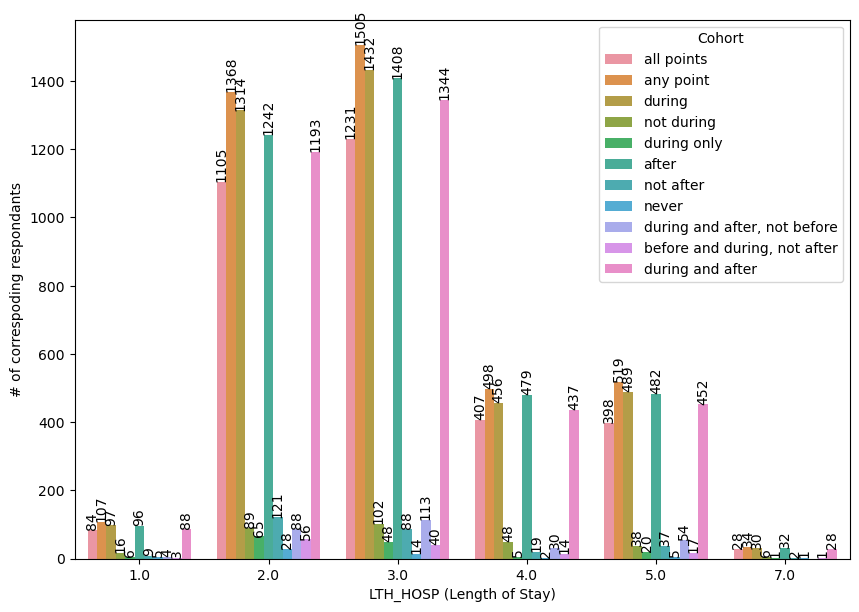

In [12]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_combined[df_combined["LTH_HOSP"] != 6], x="LTH_HOSP", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    # ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(p.get_height()),
    #        fontsize=10, color='black', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom', rotation=90)

ax.set_xlabel('LTH_HOSP (Length of Stay)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

In [13]:
df_temp = df_combined[~(df_combined["LTH_HOSP"].isna())]

for c in sorted(df_temp["LTH_HOSP"].unique()):
    print(f"~~~~ {c} ~~~~")
    t = df_temp[df_temp["LTH_HOSP"] == c]
    print(t["Cohort"].value_counts(sort=False), "\n")

~~~~ 1.0 ~~~~
Cohort
all points                       84
any point                       107
during                           97
not during                       16
during only                       6
after                            96
not after                         9
never                             5
during and after, not before      4
before and during, not after      3
during and after                 88
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
Cohort
all points                      1105
any point                       1368
during                          1314
not during                        89
during only                       65
after                           1242
not after                        121
never                             28
during and after, not before      88
before and during, not after      56
during and after                1193
Name: count, dtype: int64 

~~~~ 3.0 ~~~~
Cohort
all points                      1231
any point                       1505
duri

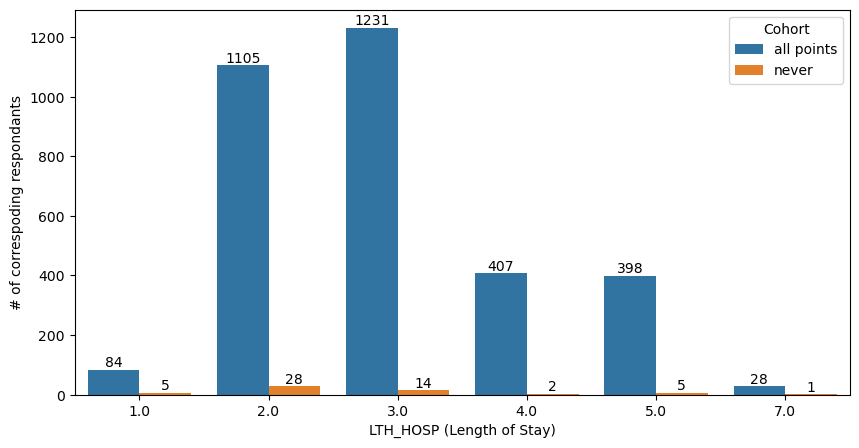

In [14]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_1, x="LTH_HOSP", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('LTH_HOSP (Length of Stay)')
ax.set_ylabel('# of correspoding respondants')


plt.show()

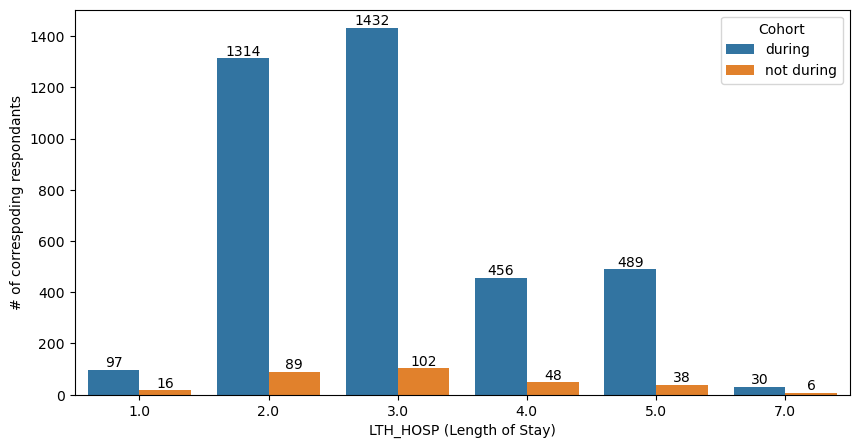

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_2, x="LTH_HOSP", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')
ax.set_xlabel('LTH_HOSP (Length of Stay)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

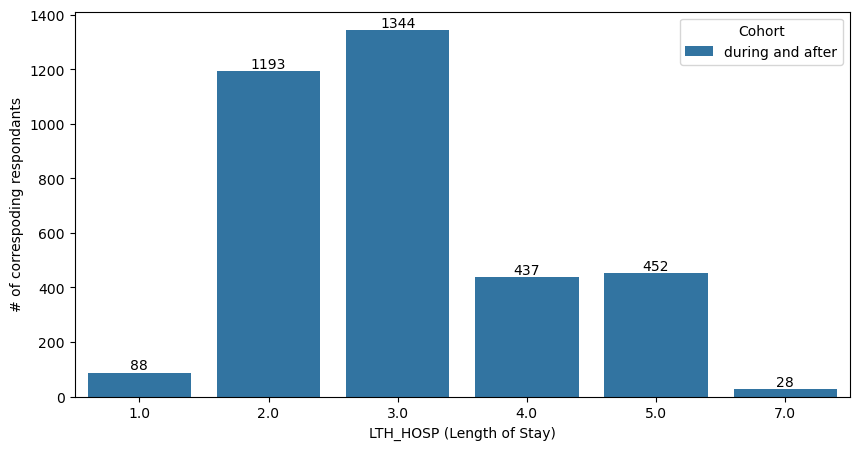

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_3, x="LTH_HOSP", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('LTH_HOSP (Length of Stay)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

## INFWMOM5_RAW


posx and posy should be finite values
posx and posy should be finite values


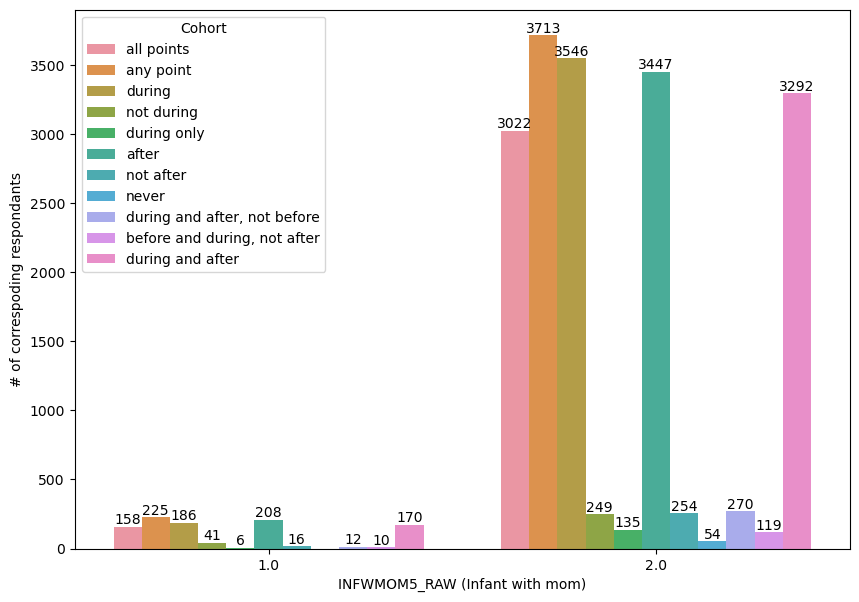

In [17]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_combined, x="INFWMOM5_RAW", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    #    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(p.get_height()),
    #            fontsize=10, color='black', ha='center', va='bottom')
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('INFWMOM5_RAW (Infant with mom)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

In [18]:
df_temp = df_combined[~(df_combined["INFWMOM5_RAW"].isna())]

for c in sorted(df_temp["INFWMOM5_RAW"].unique()):
    print(f"~~~~ {c} ~~~~")
    t = df_temp[df_temp["INFWMOM5_RAW"] == c]
    print(t["Cohort"].value_counts(sort=False), "\n")

~~~~ 1.0 ~~~~
Cohort
all points                      158
any point                       225
during                          186
not during                       41
during only                       6
after                           208
not after                        16
during and after, not before     12
before and during, not after     10
during and after                170
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
Cohort
all points                      3022
any point                       3713
during                          3546
not during                       249
during only                      135
after                           3447
not after                        254
never                             54
during and after, not before     270
before and during, not after     119
during and after                3292
Name: count, dtype: int64 



posx and posy should be finite values
posx and posy should be finite values


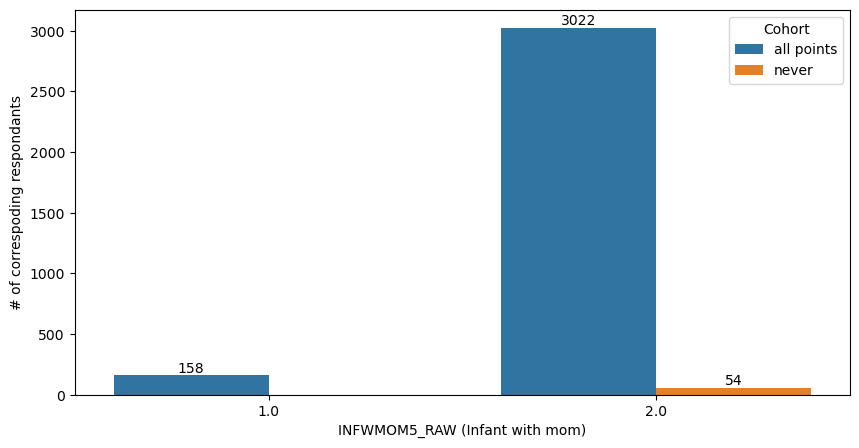

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_1, x="INFWMOM5_RAW", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('INFWMOM5_RAW (Infant with mom)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

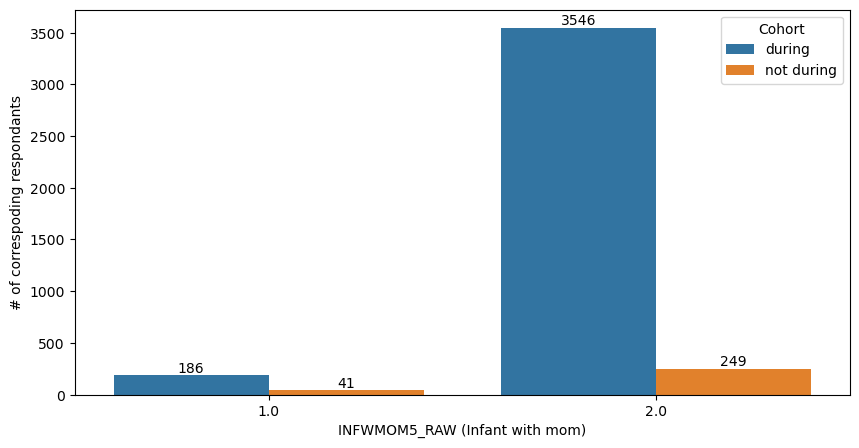

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_2, x="INFWMOM5_RAW", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('INFWMOM5_RAW (Infant with mom)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

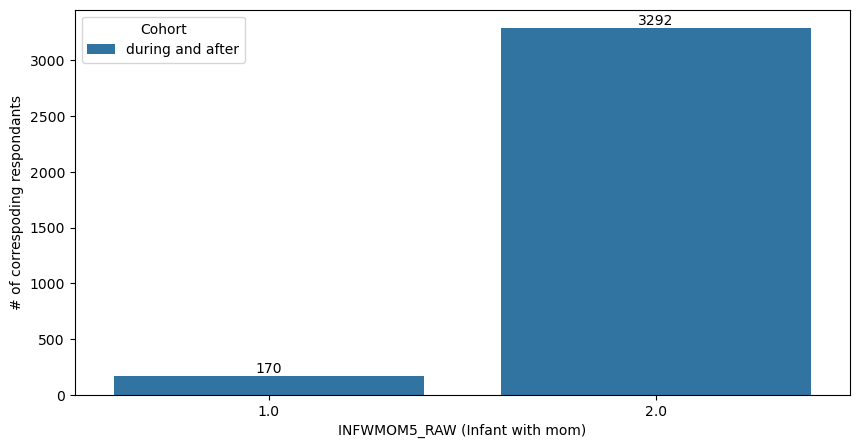

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_3, x="INFWMOM5_RAW", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('INFWMOM5_RAW (Infant with mom)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

## BBY_DRUG_WD


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


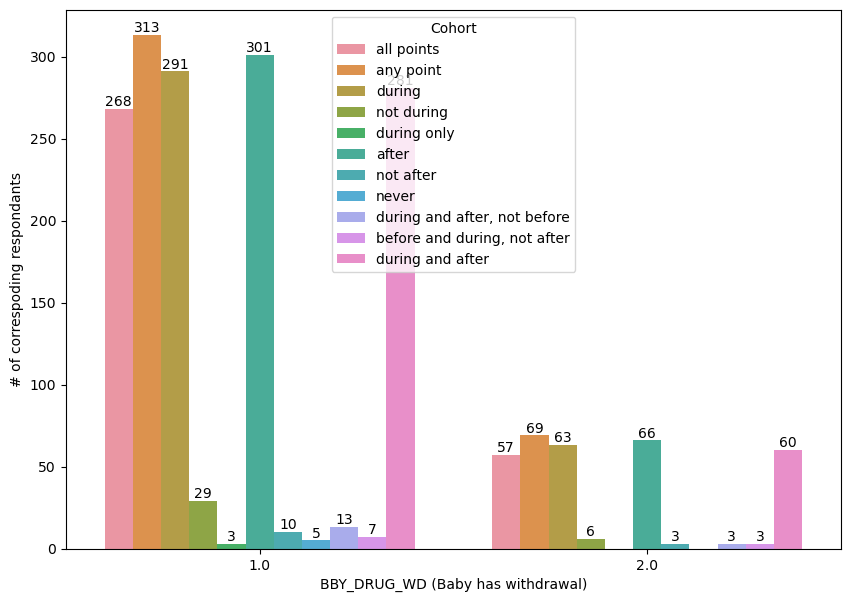

In [22]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_combined_2, x="BBY_DRUG_WD", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('BBY_DRUG_WD (Baby has withdrawal)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

In [23]:
df_combined_2[df_combined_2["BBY_DRUG_WD"] == 2]["Cohort"].value_counts(sort=False)

Cohort
all points                      57
any point                       69
during                          63
not during                       6
after                           66
not after                        3
during and after, not before     3
before and during, not after     3
during and after                60
Name: count, dtype: int64

In [24]:
#df_combined_2[~df_combined_2['BBY_DRUG_WD'].isna()][["ID","Cohort",'BBY_DRUG_WD']].drop_duplicates(subset="ID")
print(f"{len(df_combined_2[~df_combined_2['BBY_DRUG_WD'].isna()]['ID'].unique())} women answered the widthdawl questions") 

389 women answered the widthdawl questions


In [25]:
#df_combined_2[df_combined_2['BBY_DRUG_WD'].isna()][["ID","Cohort",'BBY_DRUG_WD']].drop_duplicates(subset="ID")
print(f"{len(df_combined_2[df_combined_2['BBY_DRUG_WD'].isna()]['ID'].unique())} women did NOT answer the widthdawl questions") 

3803 women did NOT answer the widthdawl questions


In [26]:
df_temp = df_combined_2[~(df_combined_2["BBY_DRUG_WD"].isna())]

for c in sorted(df_temp["BBY_DRUG_WD"].unique()):
    print(f"~~~~ {c} ~~~~")
    t = df_temp[df_temp["BBY_DRUG_WD"] == c]
    print(t["Cohort"].value_counts(sort=False), "\n")

~~~~ 1.0 ~~~~
Cohort
all points                      268
any point                       313
during                          291
not during                       29
during only                       3
after                           301
not after                        10
never                             5
during and after, not before     13
before and during, not after      7
during and after                281
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
Cohort
all points                      57
any point                       69
during                          63
not during                       6
after                           66
not after                        3
during and after, not before     3
before and during, not after     3
during and after                60
Name: count, dtype: int64 



posx and posy should be finite values
posx and posy should be finite values


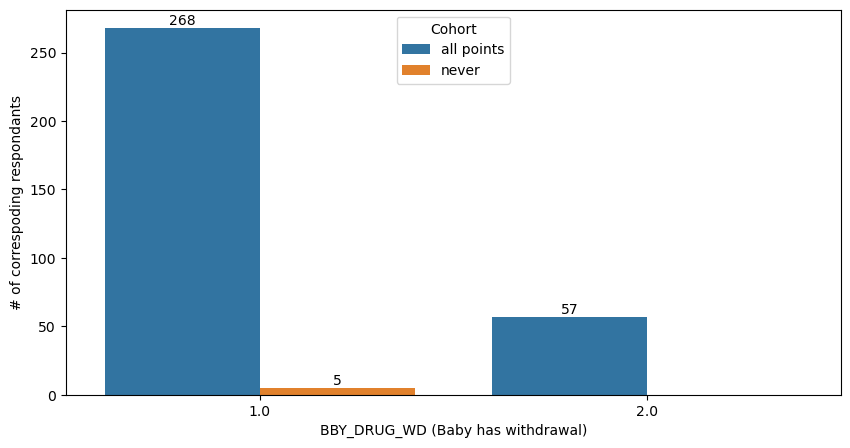

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_1_2, x="BBY_DRUG_WD", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('BBY_DRUG_WD (Baby has withdrawal)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

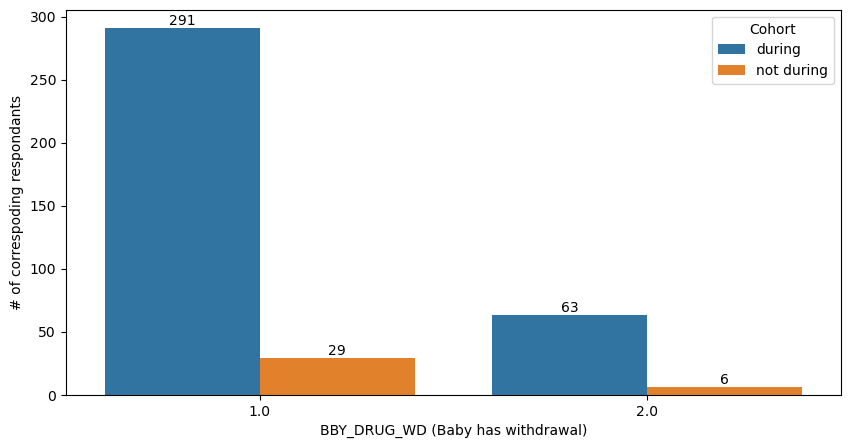

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_2_2, x="BBY_DRUG_WD", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('BBY_DRUG_WD (Baby has withdrawal)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

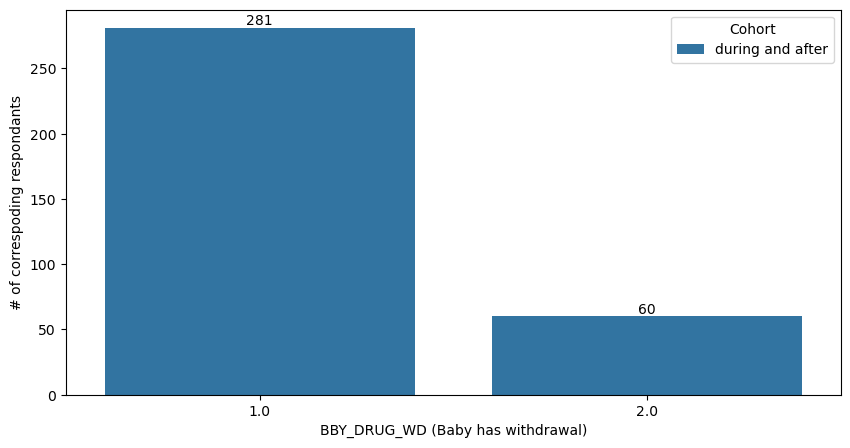

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_3_2, x="BBY_DRUG_WD", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('BBY_DRUG_WD (Baby has withdrawal)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

## AB_NICU


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


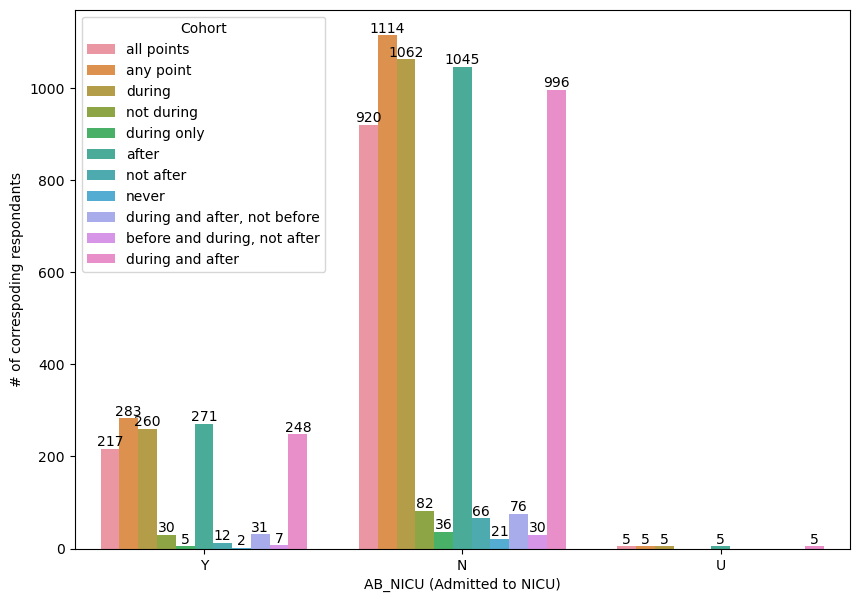

In [30]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_combined, x="AB_NICU", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('AB_NICU (Admitted to NICU)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

In [31]:
df_combined[df_combined['AB_NICU'] == 'Y']["Cohort"].value_counts(sort=False)

Cohort
all points                      217
any point                       283
during                          260
not during                       30
during only                       5
after                           271
not after                        12
never                             2
during and after, not before     31
before and during, not after      7
during and after                248
Name: count, dtype: int64

In [32]:
#df_combined_2[~df_combined_2['AB_NICU'].isna()][["ID","Cohort",'AB_NICU']].drop_duplicates(subset="ID")
print(f"{len(df_combined_2[~df_combined_2['AB_NICU'].isna()]['ID'].unique())} women answered the widthdawl questions") 

1439 women answered the widthdawl questions


In [33]:
#df_combined_2[df_combined_2['AB_NICU'].isna()][["ID","Cohort",'AB_NICU']].drop_duplicates(subset="ID")
print(f"{len(df_combined_2[df_combined_2['AB_NICU'].isna()]['ID'].unique())} women did NOT answer the AB_NICU questions") 

2753 women did NOT answer the AB_NICU questions


In [34]:
df_temp = df_combined[~(df_combined["AB_NICU"].isna())]

for c in df_temp["AB_NICU"].unique():
    print(f"~~~~ {c} ~~~~")
    t = df_temp[df_temp["AB_NICU"] == c]
    print(t["Cohort"].value_counts(sort=False), "\n")

~~~~ Y ~~~~
Cohort
all points                      217
any point                       283
during                          260
not during                       30
during only                       5
after                           271
not after                        12
never                             2
during and after, not before     31
before and during, not after      7
during and after                248
Name: count, dtype: int64 

~~~~ N ~~~~
Cohort
all points                       920
any point                       1114
during                          1062
not during                        82
during only                       36
after                           1045
not after                         66
never                             21
during and after, not before      76
before and during, not after      30
during and after                 996
Name: count, dtype: int64 

~~~~ U ~~~~
Cohort
all points          5
any point           5
during              5
after             

posx and posy should be finite values
posx and posy should be finite values


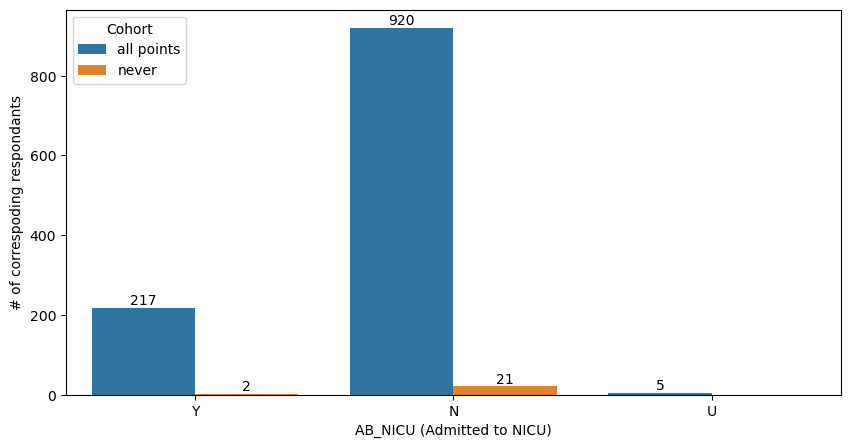

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_1, x="AB_NICU", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')

ax.set_xlabel('AB_NICU (Admitted to NICU)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

posx and posy should be finite values
posx and posy should be finite values


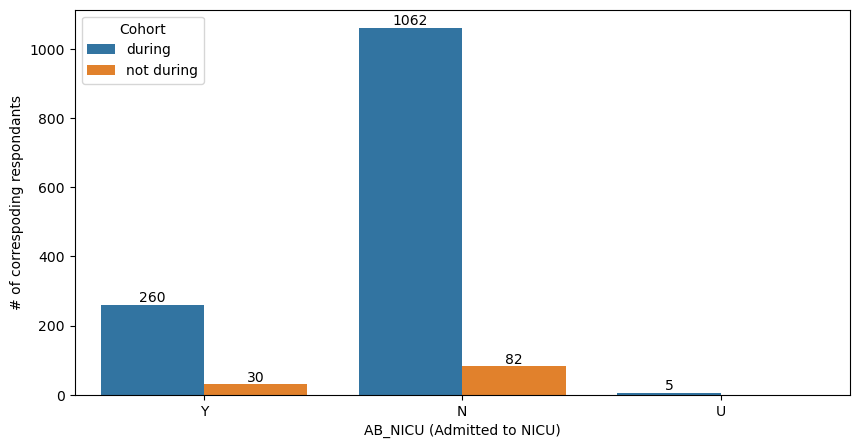

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_2, x="AB_NICU", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')
ax.set_xlabel('AB_NICU (Admitted to NICU)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

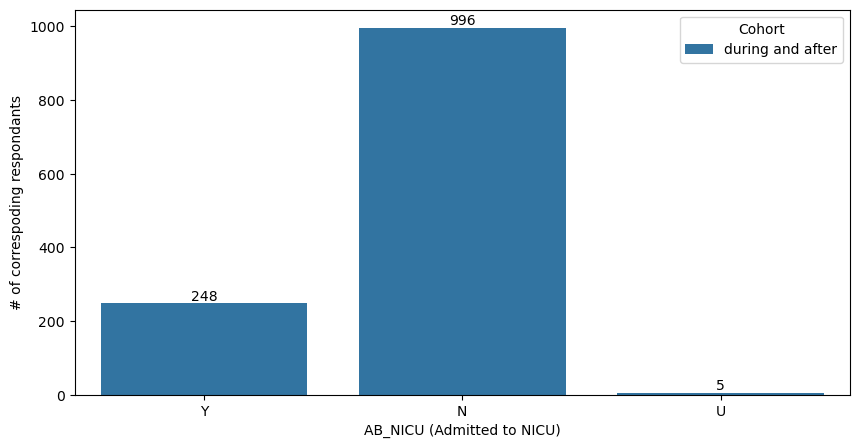

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=trim_3, x="AB_NICU", hue="Cohort")


# Add labels for each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
            fontsize=10, color='black', ha='center', va='bottom')
ax.set_xlabel('AB_NICU (Admitted to NICU)')
ax.set_ylabel('# of correspoding respondants')

plt.show()

## DP_MAT 1/2


In [38]:
k_df = df_combined_2.drop_duplicates(subset=["ID","LTH_HOSP","INFWMOM5_RAW","BBY_DRUG_WD","AB_NICU", "KOTELCHUCK"]).copy()
print(k_df.shape)

(4192, 11)


In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle('DP_MAT_RAW')

sns.countplot(ax=axes[0, 0], data=k_df, x="LTH_HOSP", hue="DP_MAT_RAW")
sns.countplot(ax=axes[0, 1], data=k_df, x="INFWMOM5_RAW", hue="DP_MAT_RAW")
sns.countplot(ax=axes[1, 0], data=k_df, x="BBY_DRUG_WD", hue="DP_MAT_RAW")
sns.countplot(ax=axes[1, 1], data=k_df, x="AB_NICU", hue="DP_MAT_RAW")

# for ax in axes:
for a in axes:
    for ax in a:
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
                    fontsize=10, color='black', ha='center', va='bottom')
    # print(ax.get_label(), p.get_height())

posx and posy should be finite values


Error in callback <function _draw_all_if_interactive at 0x120415000> (for post_execute):


In [ ]:
#df_combined_2[~df_combined_2['DP_MAT_RAW'].isna()][["ID","Cohort",'DP_MAT_RAW']].drop_duplicates(subset="ID")
print(f"{len(k_df[~k_df['DP_MAT_RAW'].isna()]['ID'].unique())} women answered the DP_MAT_RAW question") 

965 women answered the DP_MAT_RAW question


In [ ]:
#df_combined_2[df_combined_2['DP_MAT_RAW'].isna()][["ID","Cohort",'DP_MAT_RAW']].drop_duplicates(subset="ID")
print(f"{len(k_df[k_df['DP_MAT_RAW'].isna()]['ID'].unique())} women did NOT answer the DP_MAT_RAW question") 

3227 women did NOT answer the DP_MAT_RAW question


In [ ]:
#df_combined_2[df_combined_2['DP_MAT_RAW'].isna()][["ID","Cohort",'DP_MAT_RAW']].drop_duplicates(subset="ID")
print(f"{len(k_df[k_df['DP_MAT_RAW'] == 2]['ID'].unique())} women answered YES the DP_MAT_RAW question") 
print(f"{len(k_df[k_df['DP_MAT_RAW'] == 1]['ID'].unique())} women answered NO the DP_MAT_RAW question") 

207 women answered YES the DP_MAT_RAW question
758 women answered NO the DP_MAT_RAW question


In [ ]:
col_temp = [
    "LTH_HOSP",
    "INFWMOM5_RAW",
    "BBY_DRUG_WD",
    "AB_NICU",
]

for col in col_temp:
    print(f"---------------- {col} ----------------")
    df_temp = k_df[~(k_df[col].isna())]
    for c in sorted(df_temp[col].unique()):
        print(f"~~~~ {c} ~~~~")
        t = df_temp[df_temp[col] == c]
        print(t["DP_MAT_RAW"].value_counts(), "\n")

---------------- LTH_HOSP ----------------
~~~~ 1.0 ~~~~
DP_MAT_RAW
1.0    32
2.0     3
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
DP_MAT_RAW
1.0    297
2.0     42
Name: count, dtype: int64 

~~~~ 3.0 ~~~~
DP_MAT_RAW
1.0    280
2.0     78
Name: count, dtype: int64 

~~~~ 4.0 ~~~~
DP_MAT_RAW
1.0    56
2.0    37
Name: count, dtype: int64 

~~~~ 5.0 ~~~~
DP_MAT_RAW
1.0    57
2.0    37
Name: count, dtype: int64 

~~~~ 7.0 ~~~~
DP_MAT_RAW
1.0    7
2.0    1
Name: count, dtype: int64 

---------------- INFWMOM5_RAW ----------------
~~~~ 1.0 ~~~~
DP_MAT_RAW
1.0    26
2.0    15
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
DP_MAT_RAW
1.0    699
2.0    182
Name: count, dtype: int64 

---------------- BBY_DRUG_WD ----------------
~~~~ 1.0 ~~~~
DP_MAT_RAW
1.0    52
2.0    10
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
DP_MAT_RAW
1.0    6
2.0    3
Name: count, dtype: int64 

---------------- AB_NICU ----------------
~~~~ N ~~~~
DP_MAT_RAW
1.0    234
2.0     60
Name: count, dtype: int64 

~~~~ U ~~~~
DP_MA

In [ ]:
print(f"{len(k_df[~(k_df['DP_MAT_RAW'].isna()) & ~(k_df['BBY_DRUG_WD'].isna())]['ID'].unique())} women answered both Withdrawal and DP_MAT_RAW questions")

k_df[~(k_df['DP_MAT_RAW'].isna()) & ~(k_df['BBY_DRUG_WD'].isna())][['ID']].drop_duplicates(subset="ID") 


71 women answered both Withdrawal and DP_MAT_RAW questions


,ID
746,2019KY024023
749,2019KY024079
752,2019KY024167
755,2019KY025001
758,2019KY025014
...,...
6520,2020ND039112
6521,2020ND039129
6555,2020ND046035
11358,2019KY027075


In [ ]:
print(f"{len(k_df[~(k_df['DP_MAT_RAW'].isna()) & ~(k_df['BBY_DRUG_WD'].isna())]['ID'].unique())} women answered both Withdrawal and DP_MAT_RAW questions")


print(f"{len(k_df[(k_df['DP_MAT_RAW'] == 1) & ~(k_df['BBY_DRUG_WD'].isna())]['ID'].unique())} women answered Withdrawal and said NO to DP_MAT_RAW")
print(f"{len(k_df[(k_df['DP_MAT_RAW'] == 2) & ~(k_df['BBY_DRUG_WD'].isna())]['ID'].unique())} women answered Withdrawal and said YES to DP_MAT_RAW")

71 women answered both Withdrawal and DP_MAT_RAW questions
58 women answered Withdrawal and said NO to DP_MAT_RAW
13 women answered Withdrawal and said YES to DP_MAT_RAW


In [ ]:
print(f"{len(k_df[~(k_df['DP_MAT_RAW'].isna()) & ~(k_df['AB_NICU'].isna())]['ID'].unique())} women answered both AB_NICU and DP_MAT_RAW questions")


print(f"{len(k_df[(k_df['DP_MAT_RAW'] == 1) & ~(k_df['AB_NICU'].isna())]['ID'].unique())} women answered AB_NICU and said NO to DP_MAT_RAW")
print(f"{len(k_df[(k_df['DP_MAT_RAW'] == 2) & ~(k_df['AB_NICU'].isna())]['ID'].unique())} women answered AB_NICU and said YES to DP_MAT_RAW")

347 women answered both AB_NICU and DP_MAT_RAW questions
273 women answered AB_NICU and said NO to DP_MAT_RAW
74 women answered AB_NICU and said YES to DP_MAT_RAW


## KOTELCHUCK 1/2/3


In [ ]:
print(k_df.shape)

NameError: name 'df_combined_2' is not defined

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


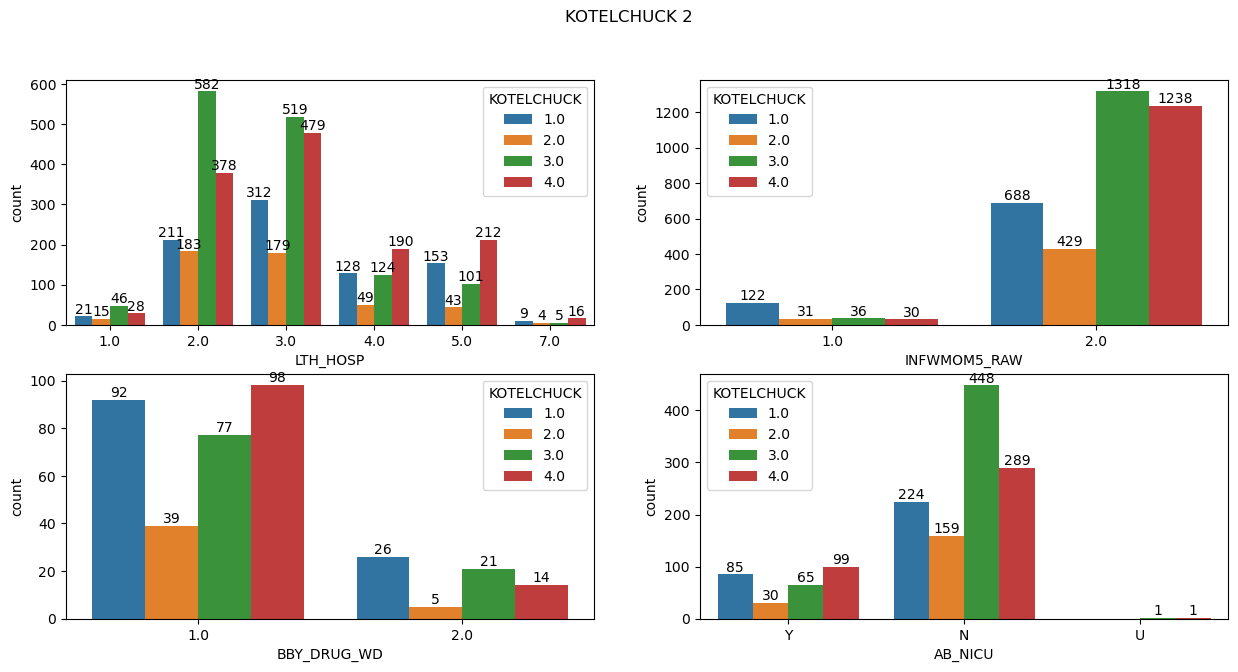

In [ ]:
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 7))
fig2.suptitle('KOTELCHUCK 2')

sns.countplot(ax=axes2[0, 0], data=k_df, x="LTH_HOSP", hue="KOTELCHUCK")
sns.countplot(ax=axes2[0, 1], data=k_df, x="INFWMOM5_RAW", hue="KOTELCHUCK")
sns.countplot(ax=axes2[1, 0], data=k_df, x="BBY_DRUG_WD", hue="KOTELCHUCK")
sns.countplot(ax=axes2[1, 1], data=k_df, x="AB_NICU", hue="KOTELCHUCK")

# for ax in axes:
for a in axes2:
    for ax in a:
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.15, '%d' % int(np.nan_to_num(p.get_height())),
                    fontsize=10, color='black', ha='center', va='bottom')

In [ ]:
for col in col_temp:
    print(f"---------------- {col} ----------------")
    df_temp = k_df[~(k_df[col].isna())]
    for c in sorted(df_temp[col].unique()):
        print(f"~~~~ {c} ~~~~")
        t = df_temp[df_temp[col] == c]
        print(t["KOTELCHUCK"].value_counts(), "\n")

---------------- LTH_HOSP ----------------
~~~~ 1.0 ~~~~
KOTELCHUCK
3.0    46
4.0    28
1.0    21
2.0    15
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
KOTELCHUCK
3.0    582
4.0    378
1.0    211
2.0    183
Name: count, dtype: int64 

~~~~ 3.0 ~~~~
KOTELCHUCK
3.0    519
4.0    479
1.0    312
2.0    179
Name: count, dtype: int64 

~~~~ 4.0 ~~~~
KOTELCHUCK
4.0    190
1.0    128
3.0    124
2.0     49
Name: count, dtype: int64 

~~~~ 5.0 ~~~~
KOTELCHUCK
4.0    212
1.0    153
3.0    101
2.0     43
Name: count, dtype: int64 

~~~~ 7.0 ~~~~
KOTELCHUCK
4.0    16
1.0     9
3.0     5
2.0     4
Name: count, dtype: int64 

---------------- INFWMOM5_RAW ----------------
~~~~ 1.0 ~~~~
KOTELCHUCK
1.0    122
3.0     36
2.0     31
4.0     30
Name: count, dtype: int64 

~~~~ 2.0 ~~~~
KOTELCHUCK
3.0    1318
4.0    1238
1.0     688
2.0     429
Name: count, dtype: int64 

---------------- BBY_DRUG_WD ----------------
~~~~ 1.0 ~~~~
KOTELCHUCK
4.0    98
1.0    92
3.0    77
2.0    39
Name: count, dtype: int64 
